# Testing equivalence of two samples   
  
by Jeffrey Chijioke-Uche (IBM) (PhD Scholar - Information Technology - Harvard University & Walden University) 

Contents:    
[1. Data](#data)    
[2. TOST](#tost)

<a id='data'></a>    
# Data   
Let's construct two equivalent random samples

In [1]:
import numpy as np
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# Let's construct two samples normally distributed with a given mean (mu) and standard deviations (std).   
sample_size=3000

mu = 1.0; std = 2.0;
sample1 = np.random.normal(loc=mu, scale=std, size=sample_size)
mu1 = sample1.mean(); std1 = sample1.std(); n1=len(sample1)
print("Sample 1: mean = {}, std ={}".format(mu1,std1))

mu = 1.0; std=2.0;
sample2 = np.random.normal(loc=mu, scale=std, size=sample_size)
mu2 = sample2.mean(); std2 = sample2.std(); n2=len(sample2)
print("Sample 2: mean = {}, std ={}".format(mu2,std2))

Sample 1: mean = 0.9625126780308956, std =1.965912306913294
Sample 2: mean = 1.0132368055437375, std =1.954123670915907


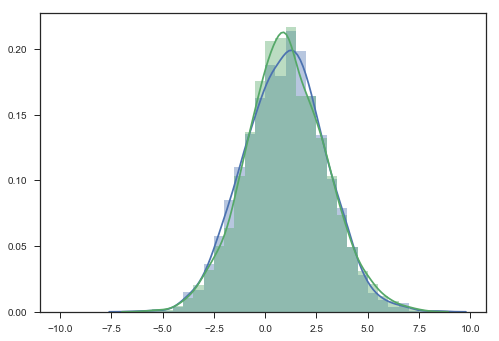

In [2]:
import matplotlib as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
#df = sns.load_dataset("anscombe")

bins = np.arange(-10,10,0.5)

# Show the results of a linear regression within each dataset
ax1 = sns.distplot(sample1,bins=bins)
ax2 = sns.distplot(sample2,bins=bins)

plt.pyplot.show()

# t-test   
We could test if the two distribution are means significantly different, see [ttest](https://github.com/trangel/stats-with-python/blob/master/notebooks//Difference between means.ipynb)

Null hypothesis    
$\mathcal{H}_0$ : $ \mu_1 - \mu_2 = 0$    

Alternative hypothesis   
$\mathcal{H}_1$ : $ \mu_1 - \mu_2 \neq 0$   

For a significance $\alpha = 0.05$


In [3]:
from scipy import stats
twosample_results = stats.ttest_ind(sample1, sample2)
TestStatistic = twosample_results[0]
pvalue = twosample_results[1]

printmd('t-score {}'.format(round(TestStatistic,2)))
printmd('p-value {}'.format(round(pvalue,4)))

t-score -1.0

p-value 0.3163

The p-value is quite large, $> 0.05$, hence we cannot reject the null hypothesis. The two samples have similar mean values.  

<a id='TOST'></a>    
# TOST test   
Another approach is to test if the two samples are equivalent with the TOST (two one-sided tests) test.   
Unlike classical hypothesis testing, equivalence tests are used to validate the fact that a difference is in a given interval.

The null hypothesis of non-equivalence is   
$\mathcal{H}_0$: 
$\mu_2 - \mu_1 \leq \epsilon_L$ and $\mu_2 - \mu_1 \geq \epsilon_U$ 

where $\mu_i$ is the mean value for sample $i$ and $\epsilon_L$, $\epsilon_U$ are the lower and upper bounds on the difference between means.   

The alternative hypothesis is   
$\mathcal{H}_1$: $\epsilon_L < \mu_2 - \mu_1 < \epsilon_U$   

The test uses the following equations:    
$T_L = \frac{\displaystyle (\mean_2 - \mean
